# Data Plotting

This notebook provides a tutorial for plotting the output of tidy3d simulations.

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

import numpy as np
import matplotlib.pylab as plt

import sys
sys.path.append('../../tidy3d')
import tidy3d as td
import tidy3d.web as web

## Setup

### Creating Simulation

First, let's make a `td.Simulation` so we have data to plot.

In [3]:
# make samplers that define the freq and time domain measurement
freqs = np.linspace(1e14, 4e14, 51)

num_modes = 3

simulation = td.Simulation(
    size=(5.0, 5.0, 5.0),
    grid_size=(0.1, 0.1, 0.1),
    run_time = 1e-12,
    pml_layers = [None, None, None],
    structures = [
        td.Structure(
            geometry=td.Box(center=(-1,0,0), size=(.6,.6,.6)),
            medium=td.Medium(permittivity=2)
        ),
        td.Structure(
            geometry=td.Box(center=(1,0,0), size=(.6,.6,.6)),
            medium=td.Medium(permittivity=2)
        )        
    ],
    sources=[td.VolumeSource(
        source_time=td.GaussianPulse(freq0=2e14, fwidth=3e13),
        center=(0.0, 0.0, 0.0),
        size=(0.0, 0.0, 0.0),
        polarization='Ez'
    )],
    monitors=[
        td.FieldMonitor(
            fields=['Ex', 'Ey', 'Ez'],
            size=(3,3,3),
            center=(0,0,0),
            freqs=freqs, 
            name='field'),
        # "field_time": td.FieldTimeMonitor(
        #     size=(3,3,3),
        #     center=(0,0,0),
        #     interval=10),
        td.FluxMonitor(
            size=(1,1,0),
            center=(2,0,0),
            freqs=freqs, 
            name='flux'),
        td.FluxTimeMonitor(
            size=(1,1,0),
            center=(2,0,0),
            interval=10,
            name='flux_time',
        ),
        td.ModeMonitor(
            size=(1,1,0),
            center=(0,0,0),
            freqs=freqs,
            modes=[td.Mode(mode_index=i) for i in range(num_modes)], 
            name='mode')
    ],
)

In [4]:
sim_data = web.run(simulation, task_name='viz_data', path='data/simulation.hdf5')

[08:56:54] INFO     Creating task.                                              ]8;id=387152;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:346

[08:56:55] INFO     Uploading the json file                                     ]8;id=69921;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:355

Output()

[08:56:57] status = queued                                                      ]8;id=483308;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:171

[08:57:10] status = preprocess                                                  ]8;id=843778;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:171

[08:57:33] status = running                                                     ]8;id=742871;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:171

[08:58:04] status = visualize                                                   ]8;id=741665;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:171

[08:58:08] status = success                                                     ]8;id=618661;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:171

[08:58:08] INFO     clearing existing files before downloading                  ]8;id=850177;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:235

           INFO     removing file data/simulation.hdf5                          ]8;id=715969;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:419

           INFO     downloading file "simulation.json" to                       ]8;id=420067;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:388
                    "data/simulation.json"

Output()

[08:58:09] INFO     downloading file "monitor_data.hdf5" to                     ]8;id=798958;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:388
                    "data/monitor_data.hdf5"

Output()

[08:58:15] INFO     getting log string                                          ]8;id=887007;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:244

           INFO     downloading file "tidy3d.log" to "data/tidy3d.log"          ]8;id=638382;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:388

Output()

           INFO     loading old monitor data to data dict                       ]8;id=319013;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:249

           INFO     creating SimulationData from monitor data dict              ]8;id=496804;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:254

           INFO     exporting SimulationData to data/simulation.hdf5            ]8;id=342491;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:261

           INFO     clearing extraneous files                                   ]8;id=300264;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:264

           INFO     removing file data/simulation.json                          ]8;id=7873;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:419

           INFO     removing file data/monitor_data.hdf5                        ]8;id=893494;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:419

           INFO     removing file data/tidy3d.log                               ]8;id=541634;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:419

           INFO     loading SimulationData from data/simulation.hdf5            ]8;id=608842;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/docs/notebooks/../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:297

## Plotting

Here we show how to plot data from each monitor

### Flux Data

`td.FluxData` and `td.FluxTimeData` is the simplest because it just stores the electromagnetic power flux through a surface as a function of the frequency and time, respectively.

First, we access the `td.MonitorData` through the dictionary `sim_data.monitor_data`.

In [6]:
# get the flux data from that monitor name
flux_data = sim_data['flux']
# flux_time_data = sim_data['flux_time']

and we can plot the values using the `td.MonitorData.plot()` method.

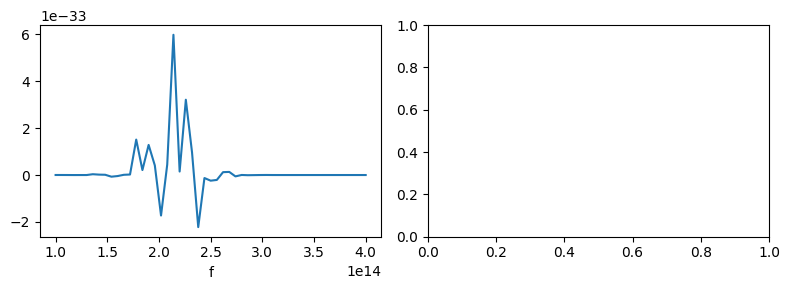

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(8,3))
flux_data.real.plot(ax=ax1)
# flux_time_data.plot(ax=ax2)

plt.show()

## Plotting Mode Data

The axes of mode data correspond to direction (+/-), mode_index, and sampler axes. 

To pot all of this data, we make two subplots and use the builting `.sel()` function to select the data to plot in each axis.

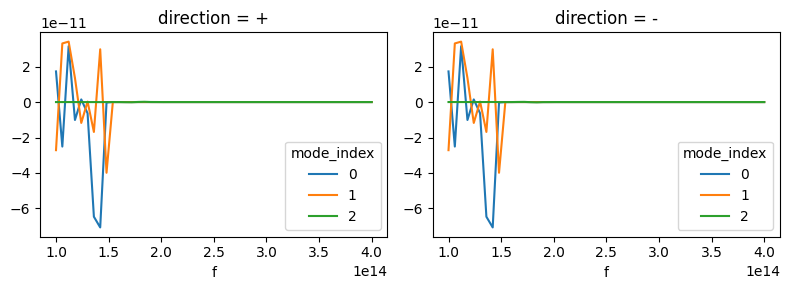

In [8]:
# tip: you can also get the monitor data directly by indexing it's name in `SimulationData`
mode_data = sim_data['mode']

f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(8, 3))

mode_data.sel(direction='+').real.plot.line(x='f', ax=ax1)
mode_data.sel(direction='-').real.plot.line(x='f', ax=ax2)
plt.show()


### Plotting Fields

Let's grab the field data and plot.

In [9]:
field_data = sim_data['field']

#### Electromagnetic Fields

In [12]:
# get the field data on the z=1.0 plane at frequency f=7.5
field_data = sim_data['field']
field_plane = field_data['Ez'].interp(f=7.5, z=1.0)

##### Amplitude Plots

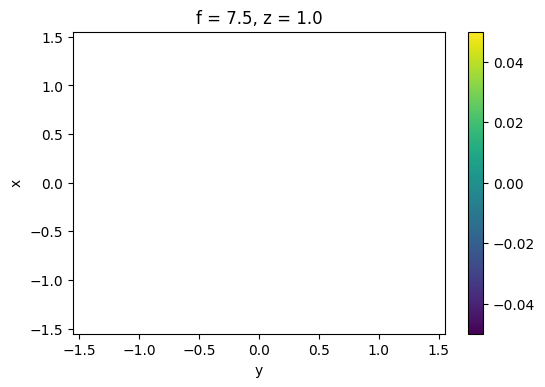

In [16]:
# amplitude plot of Ex(x,y) field on plane
abs(field_plane).plot()
plt.show()

##### Quiver Plots

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /var/folders/jx/9y0mtn3s3zzb6mzgmsw6s6gr0000gn/T/ipykernel_61705/1233886640.py:4 in       │
│ <module>                                                                                  │
│                                                                                           │
│ [Errno 2] No such file or directory:                                                      │
│ '/var/folders/jx/9y0mtn3s3zzb6mzgmsw6s6gr0000gn/T/ipykernel_61705/1233886640.py'          │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: '_PlotMethods' object has no attribute 'quiver'

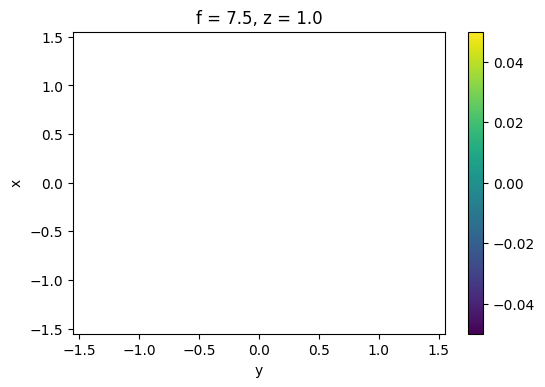

In [19]:
# quiver plot of E_{x,y}(x,y) on plane with Ez(x,y) underlying.
f, ax = plt.subplots()
field_plane.real.plot(ax=ax)
field_plane.real.plot.quiver('x', 'y', 'Ex', 'Ey', ax=ax)
plt.show()

##### Structure Overlay
One can overlay the structure permittivity by calling `plot_fields` from the `td.SimulationData` object as follows:

In [ ]:
_, ax = plt.subplots(1,1)
sim_data.simulation.plot_structures_eps(z=0.0, ax=ax, alpha=.5, cbar=False, lw=0)
field_plane.Ey.real.plot(ax=ax)
plt.show()

In [ ]:
_, ax = plt.subplots(1,1)
# sim_data.plot_fields('field_plane')
field_plane.Ey.real.plot(ax=ax)
plt.show()

#### Permittivity

If we've stored permittivity by specifing `eps_xx`, `eps_yy` or `eps_zz` in the `FieldMonitor`'s `fields`, we can access them and plot as follows.

In [ ]:
# eps_xx = field_data.eps_xx
# xx_component_plane = eps_xx.interp(z=1.0, f=7.5)
# xx_component_plane.real.plot(cmap='gist_yarg')
# plt.show()

## Tricks and Tips

The `td.MonitorData` objects can be found by indexing `td.SimulationData` directly.

In [ ]:
assert np.all(sim_data.monitor_data['mode'].data == sim_data['mode'])

Keyword arguments are passed to the correponding `.plot()` calls internally, so you can customize the plots.

In [ ]:
sim_data['flux'].plot(color='brown', linestyle='-.', label='custom line')
plt.legend()
plt.title('custom plot')
plt.show()